The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [151]:
# Loading in required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Start coding here!
nobel = pd.read_csv("data/nobel.csv")
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [152]:
# most awarded gender
top_gender = nobel.value_counts("sex").index[0]

# the most common birthplace
top_country = nobel.value_counts("birth_country").index[0]

In [153]:
# creating decades
nobel_data_decades = nobel.copy()
nobel_data_decades["decades"] = (np.floor(nobel_data_decades["year"]/10)*10).astype(int)

In [154]:
# decades with the highest proportion of US-born winners
nobel_data_decades["us_winner"] = nobel_data_decades["birth_country"] == "United States of America"
nobel_data_us_prop = nobel_data_decades.groupby("decades", as_index=False)["us_winner"].mean()
decade_usa_sorted = nobel_data_us_prop.sort_values(by="us_winner", ascending=False)
max_decade_usa = decade_usa_sorted["decades"].values[0]
max_decade_usa

2000

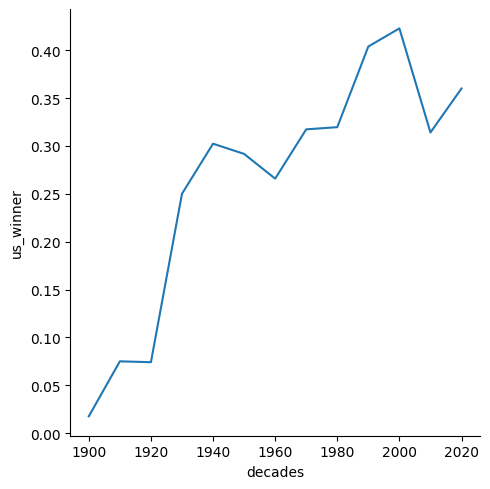

In [155]:
# plotting proportion of us winners over decades (optional)
sns.relplot(x="decades",
           y="us_winner",
           data=nobel_data_us_prop,
           kind="line")
plt.show()

In [156]:
# highest proportion of female laureates by decade and category
nobel_data_decades["female_winner"] = nobel_data_decades["sex"] == "Female"
nobel_data_female_prop = nobel_data_decades.groupby(["decades", "category"], as_index=False)["female_winner"].mean()
max_decade_female_winners_sorted = nobel_data_female_prop.sort_values(by="female_winner", ascending=False)
max_decade_female_winner = max_decade_female_winners_sorted.values[0]

In [157]:
# creating a dictionary of category and decade
max_female_dict = {max_decade_female_winner[0]: max_decade_female_winner[1]}

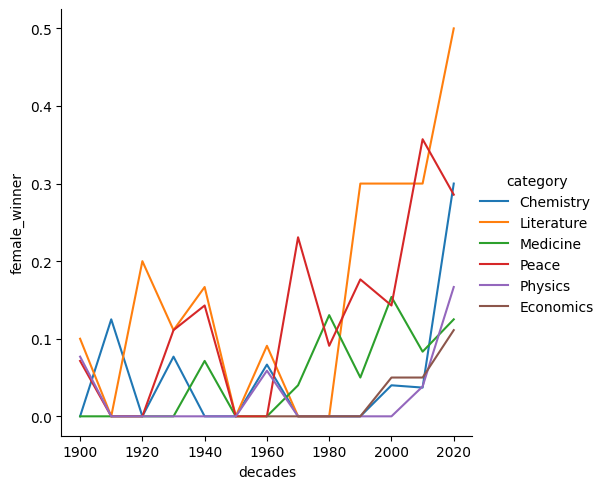

In [158]:
# plotting proportion of female winners over decades and categories (optional)
sns.relplot(x="decades",
           y="female_winner",
           data=nobel_data_female_prop,
           hue="category",
           kind="line")
plt.show()

In [159]:
# first woman to win the Nobel prize
nobel_females_by_year = nobel_data[nobel_data["sex"] == "Female"].sort_values(by="year", ascending=True)
first_woman_name = nobel_females_by_year["full_name"].values[0]
first_woman_category = nobel_females_by_year["category"].values[0]

In [160]:
# individuals and organizations that have won multiple times
ppl_counts = nobel_data["full_name"].value_counts()
name_counts = ppl_counts[ppl_counts >= 2].index
repeat_list = list(name_counts)